Here we have pubg dataset. in this dataset we have multiple column such as Id, 'groupId, matchI,assists,boosts,damageDealt,DBNOs,headshotKills, 'heals''killPlace,killPoints,kills,killStreaks, longestKill,matchDuration,matchType,maxPlace,numGroups, rankPoints,revives,rideDistance,roadKills, swimDistance,teamKills,vehicleDestroys, walkDistance, weaponsAcquired,winPoints,winPlacePerc. here  winPlacePerc is the target variable.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [127]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [128]:
data=pd.read_csv("/content/drive/MyDrive/data/data.csv")

In [ ]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [ ]:
data.shape

(1111742, 30)

In [ ]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [ ]:
data.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,2.299814e+01,1.579348e+03,4.450584e+01,4.300693e+01,8.927902e+02,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,5.106977e+01,2.589348e+02,2.381989e+01,2.327841e+01,7.366443e+02,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.444000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,2.133000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.040000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [ ]:
data.nunique()

Unnamed: 0         1111742
Id                 1111742
groupId             870622
matchId              47951
assists                 16
boosts                  23
damageDealt          23831
DBNOs                   31
headshotKills           26
heals                   55
killPlace              100
killPoints            1489
kills                   49
killStreaks             15
longestKill          24433
matchDuration         1263
matchType               16
maxPlace               100
numGroups              100
rankPoints            1707
revives                 20
rideDistance         24564
roadKills               11
swimDistance         20702
teamKills                7
vehicleDestroys          6
walkDistance         32651
weaponsAcquired         75
winPoints             1160
winPlacePerc          2557
dtype: int64

In [ ]:
data['matchType'].nunique()

16

In [ ]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

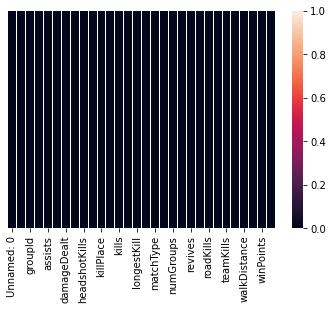

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False)

we have only one missing value in winPlacePerc in column.we can fill this missing value by mean of this column

In [ ]:
data[data["winPlacePerc"].isnull()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [ ]:
# Fill Missing Value
data["winPlacePerc"] = data["winPlacePerc"].fillna(np.mean(data["winPlacePerc"]))
data[data["winPlacePerc"].isnull()]


,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
data.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

here we can see that we have no null values in any of the columns

The next step is we can remove the value which is not necessary for prediction.In this dataset the id columns are unnecessary columns. so we can remove those columns

In [129]:
pubg=data.drop(['Unnamed: 0', 'Id', 'groupId', 'matchId'],axis=1)

In [ ]:
correlation=pubg.corr()

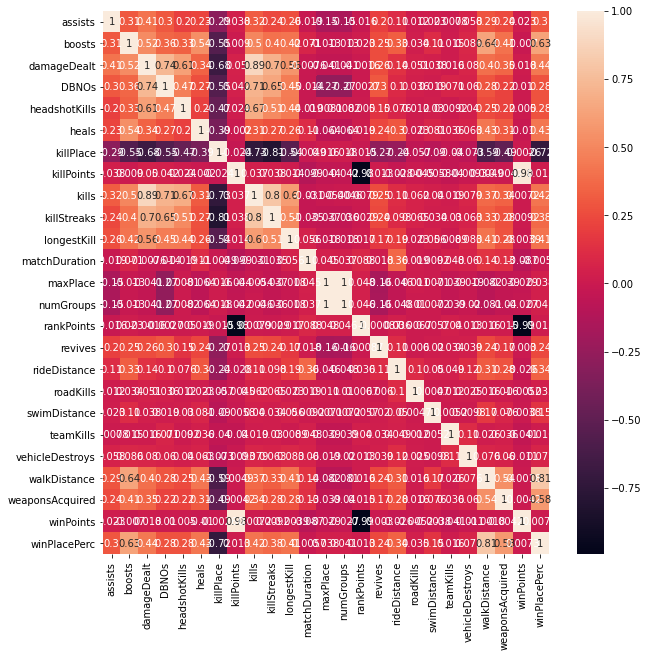

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

from this we can see that few of the features have a very good correlation with other features



In [108]:
#list of numerical feature
numerical_features=[feature for feature in pubg.columns if pubg[feature].dtypes!='O']
print('number of numerical variables : ',len(numerical_features))

number of numerical variables :  25


numerical variables are usually two types. one is continuous and another one is discrete

In [109]:
discrete_feature=[feature for feature in numerical_features if len(pubg[feature].unique()<25)]
print("discrete variables count : {} ".format(len(discrete_feature)))

discrete variables count : 25 


we can see that we have 25 discrete features

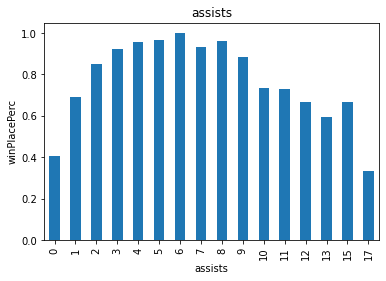

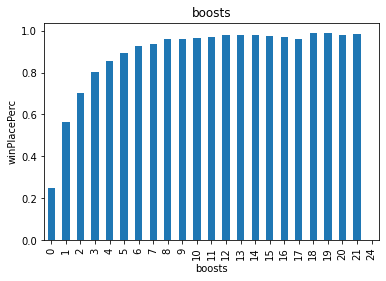

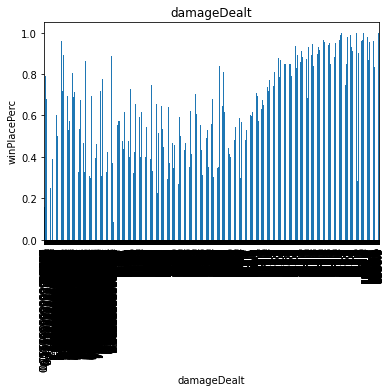

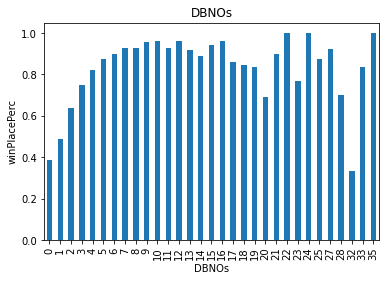

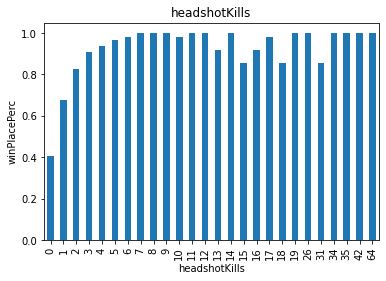

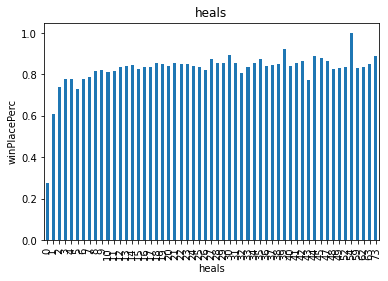

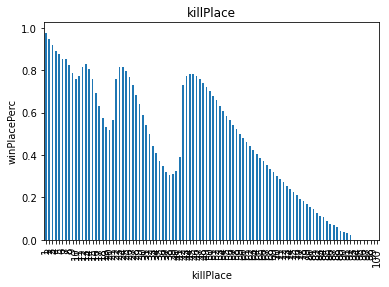

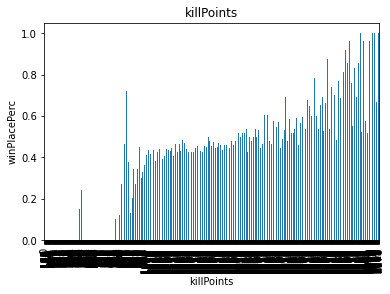

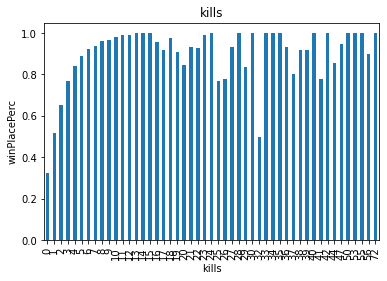

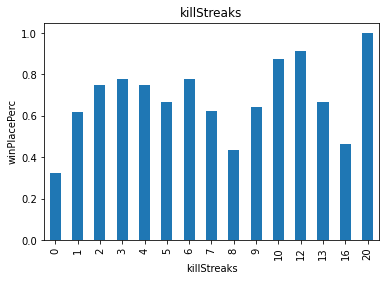

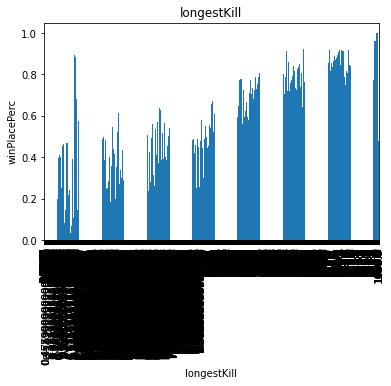

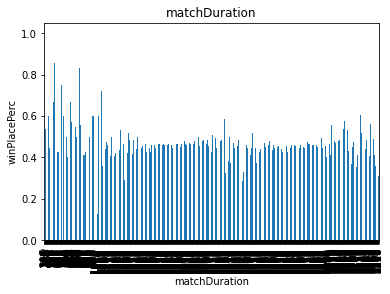

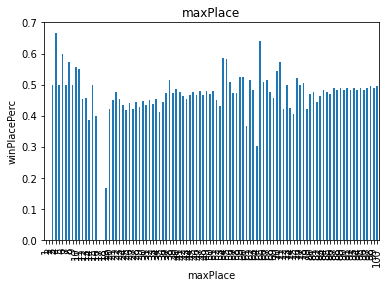

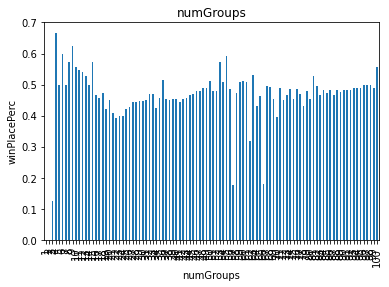

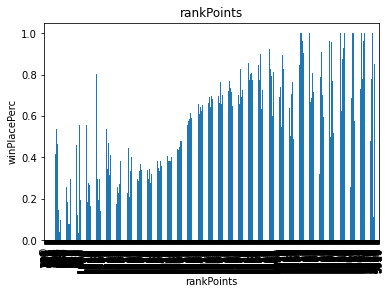

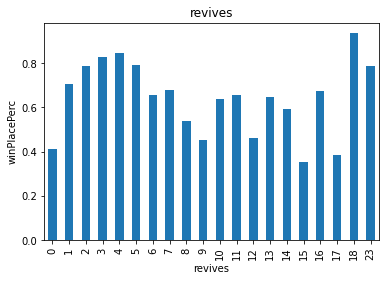

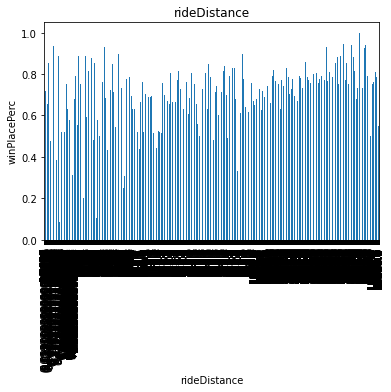

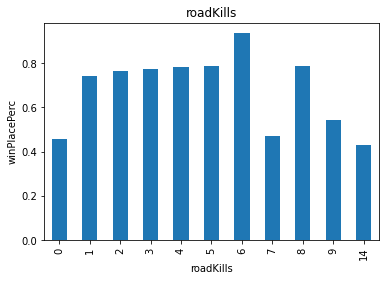

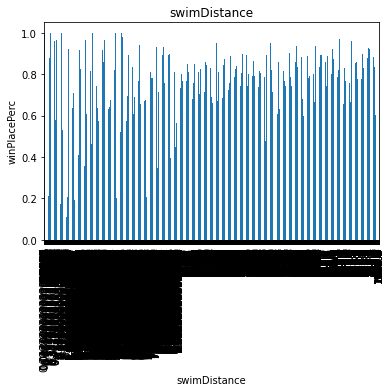

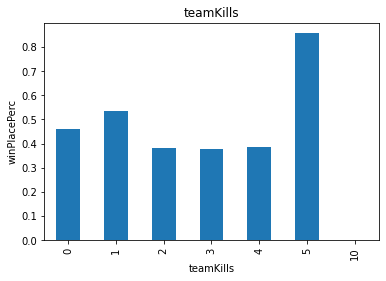

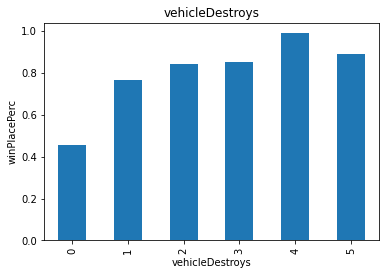

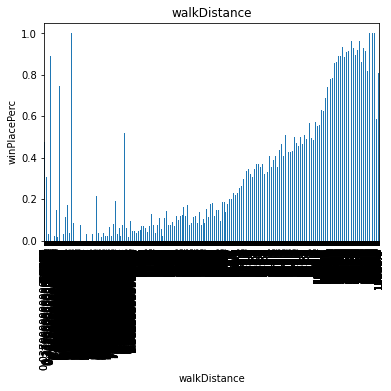

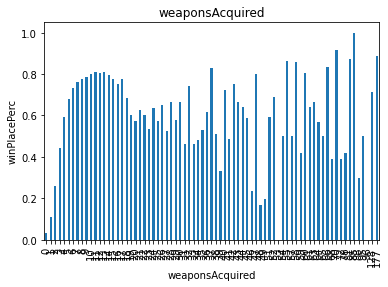

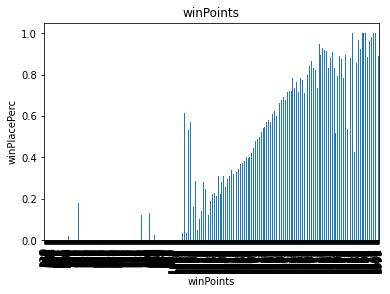

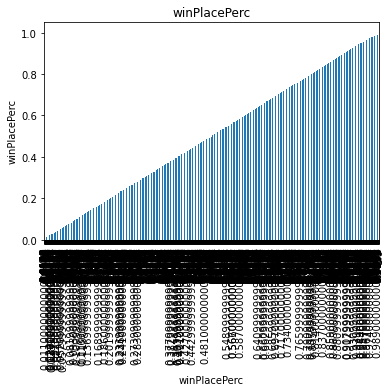

In [81]:
for feature in discrete_feature:
  dataset=pubg.copy()
  dataset.groupby(feature)['winPlacePerc'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('winPlacePerc')
  plt.title(feature)
  plt.show()

In [ ]:
sns.boxplot(pubg['winPlacePerc'])

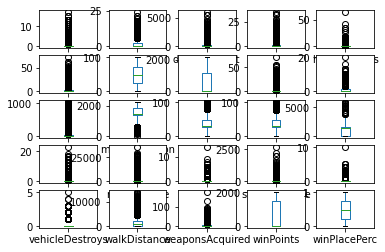

In [101]:
pubg.plot(kind='box',subplots=True,layout=(5,5),sharex=False,sharey=False )
plt.show()

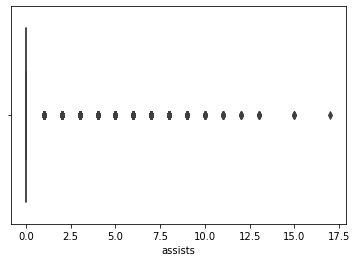

In [103]:
sns.boxplot(pubg['assists'])

In [113]:
def detect_outliers(data,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(data[c],25)
        # 3rd quartile
        Q3 = np.percentile(data[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 3)
    
    return multiple_outliers

In [130]:
pubg=pubg.drop(['matchType'],axis=1)

In [131]:
pubg.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [132]:
x=pubg.iloc[:,:-1].values
y=pubg.iloc[:,-1].values

In [133]:
print(x)

[[0.000e+00 0.000e+00 2.593e+01 ... 1.513e+02 1.000e+00 1.525e+03]
 [0.000e+00 0.000e+00 3.671e+01 ... 1.918e+03 7.000e+00 1.516e+03]
 [0.000e+00 1.000e+00 4.773e+01 ... 8.200e+02 7.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 1.193e+02 ... 6.045e+01 1.000e+00 0.000e+00]
 [1.000e+00 4.000e+00 5.351e+01 ... 2.209e+03 4.000e+00 0.000e+00]
 [5.000e+00 3.000e+00 6.074e+02 ... 3.713e+03 5.000e+00 1.611e+03]]


In [134]:
print(y)

[0.0667 0.5862 0.8105 ... 0.7174 0.9    1.    ]


In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [143]:

from sklearn.metrics import r2_score, mean_squared_erro

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

In [ ]:
#predicting rest result
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))